<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/IAP_Tercer_Parcial_CNN_y_T_sne_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA 1

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import cv2

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## PREPARAR DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descargar los datos desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fruit_data.csv')

In [ ]:
train_Un = np.array([data.loc[i] for i in data.index if data.loc[i, 'Kind'] == 'Unsupervised'])

In [ ]:
#Obtenemos los datos del drive
mypath='/content/drive/MyDrive/Colab Notebooks/Data Parcial 3'
#Creamos un array solo de las dimensiones de las imagenes y la cantidad
trainUn_images = np.empty(shape=(len(train_Un), 100, 100, 3),dtype=int)
for n in range(0, len(train_Un)):
  trainUn_images[n] = cv2.imread(join(mypath,train_Un[n][0]))

In [ ]:
# le damos forma para que PCA lo reconozca 
trainUn_images = trainUn_images[:,:,:,0]
x_train = trainUn_images.astype('float32') 
x_train = trainUn_images/255.0
X_train = x_train.reshape(len(x_train),-1)

## MODELO Y GRAFICA

In [ ]:
#Con PCA reducimos de 1000 componentes a 50 para despues entrenar eso en el T-sne y que tome las similitudes
pca = PCA(n_components=50)
pca_result = pca.fit_transform(X_train)

tsne = TSNE(n_components=2, perplexity=20, early_exaggeration=4.0, n_iter=1000,
            n_iter_without_progress=50, min_grad_norm=0, init='pca', method='exact', verbose=2)
tsne_result = tsne.fit_transform(pca_result)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 766 / 766
[t-SNE] Mean sigma: 6.647955
[t-SNE] Iteration 50: error = 9.1058712, gradient norm = 0.0226562 (50 iterations in 0.704s)
[t-SNE] Iteration 100: error = 9.2588852, gradient norm = 0.0144366 (50 iterations in 0.663s)
[t-SNE] Iteration 150: error = 9.4040817, gradient norm = 0.0134480 (50 iterations in 0.655s)
[t-SNE] Iteration 200: error = 9.4976346, gradient norm = 0.0088242 (50 iterations in 0.652s)
[t-SNE] Iteration 250: error = 9.5814251, gradient norm = 0.0071018 (50 iterations in 0.659s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 9.581425
[t-SNE] Iteration 300: error = 0.3495782, gradient norm = 0.0010956 (50 iterations in 0.656s)
[t-SNE] Iteration 350: error = 0.2666373, gradient norm = 0.0003864 (50 iterations in 0.656s)
[t-SNE] Iteration 400: error = 0.2405762, gradient norm = 0.0002292 (50 iterations in 0.668s)
[t-SNE] Iteration 450: error = 0.228811

In [ ]:
#función que se utiliza para mostrar el conjunto de datos transformado.
def scatter(x):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    ax.axis('tight')

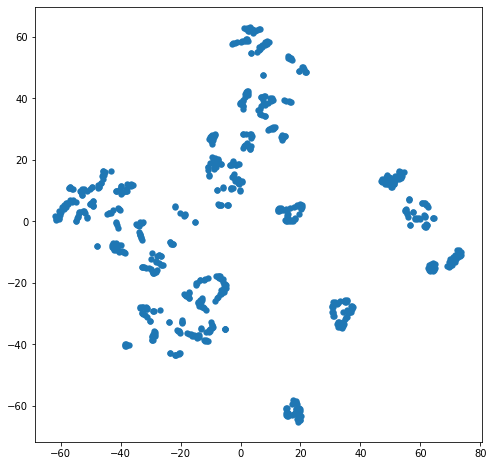

In [ ]:
scatter(tsne_result)

 ##  ¿Cuántas frutas distintas están representadas?
Como se puede observar en la grafica de arriba el modelo predice que son 6 frutas, pero pueden ser un poco mas pero como no tenemos un label al que basarnos asi a simple vista el modelo T-sne predice por lo menos 6 por la forma en que agrupan los puntos. 
Primero lo que hacemos en el modelo es que PCA convierte los datos de (766,1000) a (766,50) para tener algo pequeño antes de entrenar el modelo con T-sne, esto se recomienda ya que solo usar T-sne puede haber un poco de perdida de informacion en cada uno y mas porque aqui son imagenes. Para despues con la entrada de (766,50) se convierta en (766,2) y aparte de convertirlo a algo mas pequeño toma las similutudes de cada punto y hace la agrupacion en sub grupos como esta en la imagen.


Fuente: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# PROBLEMA 2

---



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import cv2

from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## PREPARAR DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Descargar los datos desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fruit_data.csv')

In [ ]:
train = np.array([data.loc[i] for i in data.index if data.loc[i, 'Kind'] == 'Train'])
test = np.array([data.loc[i] for i in data.index if data.loc[i, 'Kind'] == 'Test'])
labels = np.array([data.loc[i][2] for i in data.index if data.loc[i, 'Kind'] == 'Train'])

In [ ]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(labels)

In [ ]:
mypath='/content/drive/MyDrive/Colab Notebooks/Data Parcial 3'
test_images = np.empty(shape=(len(test), 100, 100, 3),dtype=int)
for n in range(len(test)):
  test_images[n] = cv2.imread(join(mypath,test[n][0]))

In [ ]:
mypath='/content/drive/MyDrive/Colab Notebooks/Data Parcial 3'
train_images = np.empty(shape=(len(train), 100, 100, 3),dtype=int)
for n in range(len(train)):
  train_images[n] = cv2.imread(join(mypath,train[n][0]))

In [ ]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

## MODELO

In [ ]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100,100,3)))
cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(Flatten())

cnn.add(tf.keras.layers.Dense(32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(16, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(3, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        9

In [ ]:
opt = tf.keras.optimizers.Adam()
cnn.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
epochs=25
callback = [tf.keras.callbacks.ModelCheckpoint("model.weights.best.hdf5", monitor='loss', save_best_only=True, mode='min')]
h1 = cnn.fit(train_images,
         train_labels,
         epochs=epochs,
         validation_data =(valid_images, valid_labels),
         callbacks=callback)

Epoch 1/25
5/5 [==============================] - 31s 135ms/step - loss: 1.6974 - accuracy: 0.3853 - val_loss: 8.9206 - val_accuracy: 0.6842
Epoch 2/25
5/5 [==============================] - 0s 29ms/step - loss: 1.2936 - accuracy: 0.4980 - val_loss: 12.8594 - val_accuracy: 0.6842
Epoch 3/25
5/5 [==============================] - 0s 31ms/step - loss: 0.6989 - accuracy: 0.6668 - val_loss: 13.4264 - val_accuracy: 0.6842
Epoch 4/25
5/5 [==============================] - 0s 30ms/step - loss: 0.6922 - accuracy: 0.7366 - val_loss: 11.1364 - val_accuracy: 0.6842
Epoch 5/25
5/5 [==============================] - 0s 31ms/step - loss: 0.6990 - accuracy: 0.7276 - val_loss: 6.7124 - val_accuracy: 0.6842
Epoch 6/25
5/5 [==============================] - 0s 30ms/step - loss: 0.7531 - accuracy: 0.7392 - val_loss: 3.6164 - val_accuracy: 0.6842
Epoch 7/25
5/5 [==============================] - 0s 31ms/step - loss: 0.5682 - accuracy: 0.7436 - val_loss: 2.9080 - val_accuracy: 0.6842
Epoch 8/25
5/5 [======

## ACCURACY

In [ ]:
#Funcion para crear las graficas
def graph(h1):
    epoch_range = range(1, len(h1.epoch)+1)

    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.plot(epoch_range,h1.history['loss'])
    plt.plot(epoch_range, h1.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'])

    plt.subplot(1,2,2)
    plt.plot(epoch_range, h1.history['accuracy'])
    plt.plot(epoch_range, h1.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

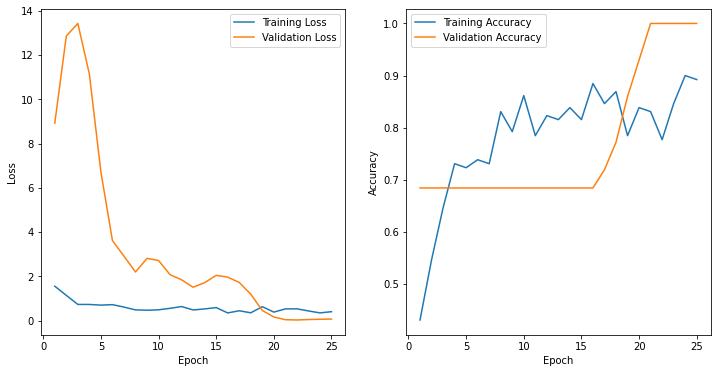

In [ ]:
graph(h1)

In [ ]:
#Dado la prediccion obtener el accuracy dependiendo con los labels del test verdadero
test_prob = cnn.predict(valid_images)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == valid_labels)

print(test_accuracy)

1.0


## PREDICCIONES

In [ ]:
fruits = {0:'Huckleberry',1:'Orange',2:'Strawberry'}

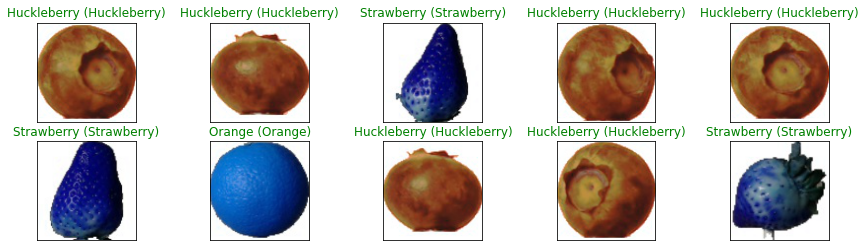

In [ ]:
test_prob = cnn.predict(valid_images)

# imágenes de prueba, sus etiquetas predichas y la verdadera
figure = plt.figure(figsize=(15, 4))
for i, index in enumerate(np.random.choice(valid_images.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Mostrar cada imagen 
    ax.imshow(np.squeeze(valid_images[index]))
    predict_index = np.argmax(test_prob[index])
    true_index = valid_labels[index]
    # Ponerle titulo a las imagenes
    ax.set_title("{} ({})".format(list(fruits.values())[predict_index], 
                                  list(fruits.values())[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## GUARDAR EN CSV

In [ ]:
Y_val = cnn.predict(test_images)
fruit = [fruits[np.argmax(x)] for x in Y_val]

In [ ]:
for x in range(len(test)):
    test[x][2] = fruit[x]

In [ ]:
prediccion = pd.DataFrame(test, columns = ['File','Kind','Fruit'])

In [ ]:
prediccion.to_csv("fruit_data_1739605.csv") 